-----

### DNN의 기본 구성과 레이어 학습과정
- mnist 데이터(binary image) 학습모델

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import numpy as np
from keras import datasets
from keras.utils import np_utils
import keras

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# one-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# get shape of data
L,W,H = X_train.shape
print(L) # data length
print(W) # image W
print(H) # image H

X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1, W*H)
X_train = X_train / 255.0
X_test = X_test / 255.0

/anaconda/envs/gsshop/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


60000
28
28


In [2]:
model=Sequential()
model.add(Dense(64, activation='relu', input_dim=W*H))
model.add(layers.Dropout(0.2)) # keras 에서 dropout의 의미 : 20%의 node를 drop하여 학습.
model.add(Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.6678 - acc: 0.7931 - val_loss: 0.2274 - val_acc: 0.9352
Epoch 2/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.3111 - acc: 0.9106 - val_loss: 0.1730 - val_acc: 0.9508
Epoch 3/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.2503 - acc: 0.9266 - val_loss: 0.1455 - val_acc: 0.9577
Epoch 4/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.2127 - acc: 0.9385 - val_loss: 0.1320 - val_acc: 0.9616
Epoch 5/10
48000/48000 [==============================] - 2s 34us/step - loss: 0.1871 - acc: 0.9449 - val_loss: 0.1211 - val_acc: 0.9650
Epoch 6/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.1712 - acc: 0.9484 - val_loss: 0.1147 - val_acc: 0.9668
Epoch 7/10
48000/48000 [==============================] - 2s 37us/step - loss: 0.1606 - acc: 0.9528 - val_loss: 0.1128 - val_acc

validation set : train - test 만 가지고 모델링을 학습하고 평가하면, overfitting에 대한 검증이 어렵고 overfitting이 일어날 확률도 높음. 적은 데이터셋인 경우엔 cross validation을 가지고 이를 극복하지만, 데이터가 큰 경우는 val set으로 test 전의 모델의 대략적인 성능을 가늠하고, test score와 비교하여 overfitting의 여부도 확인해보는 역할을 함.

validation set -> epoch 마다 shuffle이 되는 게 아니고, 고정 데이터셋을 분리해서 사용함.

### color image 학습
- cifar-10 data(3 channel)

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
  
L,W,H,C = X_train.shape
print(L) # data length
print(W) # image W
print(H) # image H
print(C) # image Channel

X_train = X_train.reshape(-1, W*H*C)
X_test = X_test.reshape(-1, W*H*C)
  
X_train = X_train / 255.0
X_test = X_test / 255.0

50000
32
32
3


In [5]:
model=Sequential()
model.add(Dense(128, activation='relu', input_dim=W*H*C))
model.add(layers.Dropout(0.15))
model.add(Dense(96, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(10, activation = 'softmax')) # 최종 class의 개수가 10개이므로, output dense도 10개로 맞춰줌
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

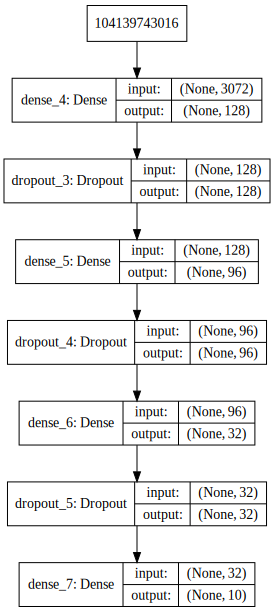

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
import matplotlib.pyplot as plt

history = model.fit(X_train, Y_train, epochs=50, batch_size=1500, validation_split=0.2)
performance_test=model.evaluate(X_test,Y_test, batch_size=1500)
print('Test Loss and Accuracy ->', performance_test)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 3s 74us/step - loss: 2.3192 - acc: 0.1200 - val_loss: 2.2468 - val_acc: 0.1796
Epoch 2/50
40000/40000 [==============================] - 3s 63us/step - loss: 2.2157 - acc: 0.1727 - val_loss: 2.1184 - val_acc: 0.2418
Epoch 3/50
40000/40000 [==============================] - 3s 63us/step - loss: 2.1215 - acc: 0.2124 - val_loss: 2.0189 - val_acc: 0.2817
Epoch 4/50
40000/40000 [==============================] - 3s 63us/step - loss: 2.0513 - acc: 0.2399 - val_loss: 1.9591 - val_acc: 0.3041
Epoch 5/50
40000/40000 [==============================] - 3s 63us/step - loss: 1.9956 - acc: 0.2621 - val_loss: 1.8855 - val_acc: 0.3306
Epoch 6/50
40000/40000 [==============================] - 3s 64us/step - loss: 1.9507 - acc: 0.2820 - val_loss: 1.8495 - val_acc: 0.3445
Epoch 7/50
40000/40000 [==============================] - 3s 64us/step - loss: 1.9230 - acc: 0.2979 - val_loss: 1.8279 - val_acc

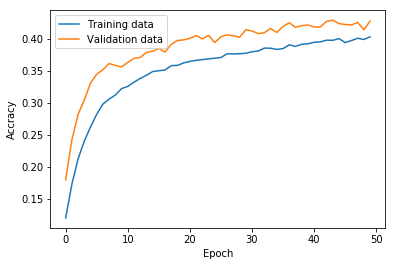

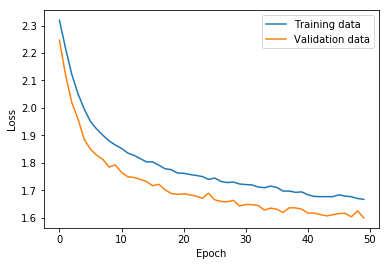

In [8]:
# visualize model acc
history = history.history
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.ylabel('Accracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

# visualize model loss
history = history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

### 텐서보드와 연동하기

In [10]:
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
history = model.fit(X_train, Y_train, epochs=10, batch_size=1500, validation_split=0.2, callbacks=[tb_hist])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 67us/step - loss: 1.6430 - acc: 0.4126 - val_loss: 1.5870 - val_acc: 0.4331
Epoch 2/10
40000/40000 [==============================] - 2s 61us/step - loss: 1.6391 - acc: 0.4131 - val_loss: 1.5765 - val_acc: 0.4355
Epoch 3/10
40000/40000 [==============================] - 3s 79us/step - loss: 1.6372 - acc: 0.4121 - val_loss: 1.5796 - val_acc: 0.4355
Epoch 4/10
40000/40000 [==============================] - 3s 67us/step - loss: 1.6315 - acc: 0.4104 - val_loss: 1.5725 - val_acc: 0.4364
Epoch 5/10
40000/40000 [==============================] - 2s 62us/step - loss: 1.6384 - acc: 0.4125 - val_loss: 1.5813 - val_acc: 0.4344
Epoch 6/10
40000/40000 [==============================] - 2s 62us/step - loss: 1.6389 - acc: 0.4115 - val_loss: 1.5825 - val_acc: 0.4317
Epoch 7/10
40000/40000 [==============================] - 2s 61us/step - loss: 1.6308 - acc: 0.4142 - val_loss: 1.5845 - val_acc

#### !(terminal) tensorboard --logdir={your log_dir path}
http://127.0.0.1:6006/

-----

### Early Stopping 기법

In [13]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5) # 증감을 지켜보는 최소 에포크 개수
history = model.fit(X_train, Y_train, epochs=10, batch_size=1500, validation_split=0.2, callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 3s 65us/step - loss: 1.6168 - acc: 0.4210 - val_loss: 1.5600 - val_acc: 0.4436
Epoch 2/10
40000/40000 [==============================] - 2s 62us/step - loss: 1.6140 - acc: 0.4189 - val_loss: 1.5908 - val_acc: 0.4356
Epoch 3/10
40000/40000 [==============================] - 3s 63us/step - loss: 1.6108 - acc: 0.4230 - val_loss: 1.5619 - val_acc: 0.4408
Epoch 4/10
40000/40000 [==============================] - 3s 64us/step - loss: 1.6072 - acc: 0.4226 - val_loss: 1.5724 - val_acc: 0.4305
Epoch 5/10
40000/40000 [==============================] - 3s 64us/step - loss: 1.6089 - acc: 0.4235 - val_loss: 1.5676 - val_acc: 0.4389
Epoch 6/10
40000/40000 [==============================] - 3s 63us/step - loss: 1.6039 - acc: 0.4233 - val_loss: 1.5626 - val_acc: 0.4418


- val_loss가 감소하지 않는 기간동안(5개)의 epoch를 발견하면 종료됨

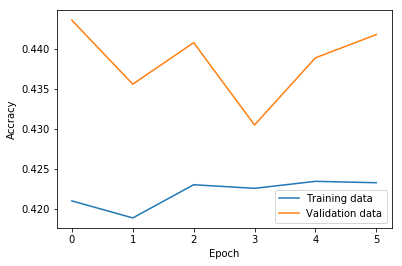

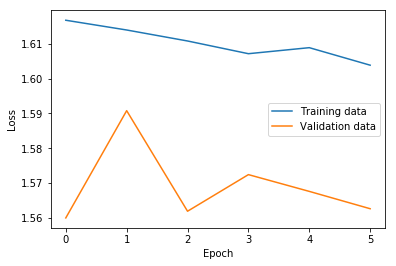

In [14]:
# visualize model acc
history = history.history
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.ylabel('Accracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

# visualize model loss
history = history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

#### 참고 : ModelCheckpoint()를 사용하면, 각 epoch마다의 가중치를 파일형태로 저장할 수 있음. 학습이 완료된 후 가장 좋은 순간의 모델을 사용하고 싶은 경우 반드시 사용.

-----